Author: [DistilledData](https://github.com/DistilledData)

%%latex
\tableofcontents
\pagebreak

# Introduction to this workbook

This tutorial will focus on describing the basics of classification from a statistics/data science perspective. We will use scikit-learn for the toy dataset and for the algorithms that construct the models. <br>
This notebook will focus on basic theory for classification problems. Since the model construction requires further considerations concerning the model and related theoretical considerations, we will leave the exercise of constructing a model to another notebook.

# Some Background for Supervised Learning

In general, we have some information that lives in feature space $\cal{X}$. We want to use this information to predict some outcome that lives in a outcome space $\cal{Y}$. In order to construct our prediction, we use scary math that maps our feature space to some intermediate action space $\cal{A}$ (we use this intermediate space because not all models can directly predict $\cal{Y}$).

For our formalization, we will consider the most basic form of classification: binary classification (just because it is basic, does not mean it is easy!). Common examples from everyday life include spam filters (i.e. spam/not spam), pregnancy tests, and churn prediction.

## Confusion Matrix

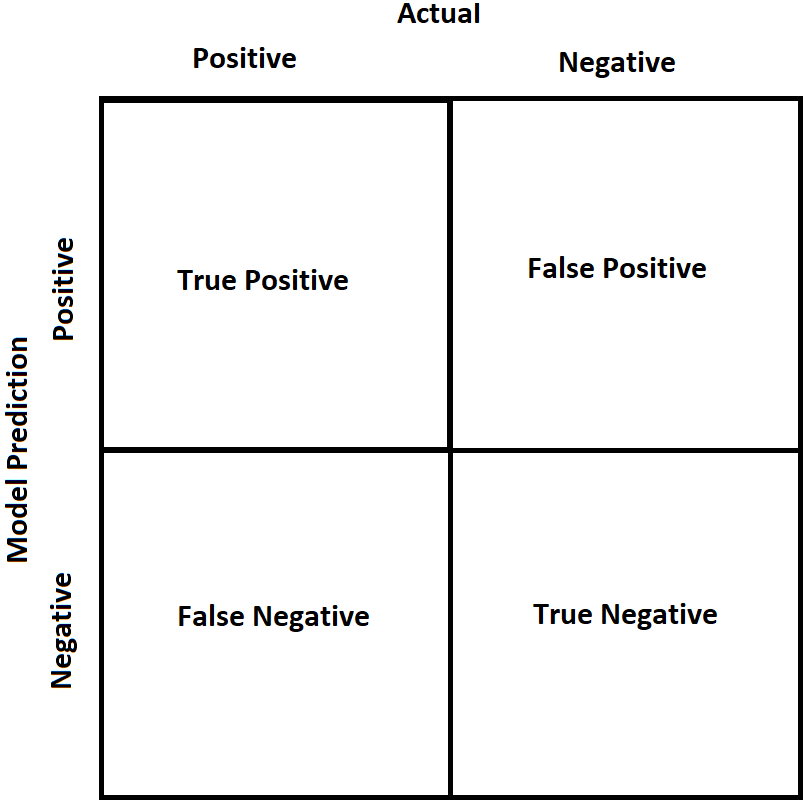

In [1]:
from IPython.display import Image
Image("../../docs/images/SimpleConfusionMatrix.png")

Binary classification allows us to construct some metrics that help us determine whether our models are useful. The matrix above (also called a confusion matrix) demonstrates the four possibilities for the accuracy for the model: <br><br>
1) The model predicts the positive class for a given data point $x_i$ and $x_i$ is actually in the positive class (e.g. we predict a pregnant woman is pregnant or an e-mail for male enhancement is correctly specified as spam). This is also called a True Positive (TP). <br><br>
2) The model predicts the positive class for a given data point $x_i$, but $x_i$ is actually in the negative class (e.g. we predict a non-pregnant woman or man is pregnant, or we classify an e-mail from your boss incorrectly as spam). This is also called a False Positive (FP). This is sometimes also referred to as Type I error. <br><br>
3) The model predicts the negative class for a given data point $x_i$, but $x_i$ is actually in the positive class (e.g. we predict a pregnant woman is not pregnant or that an e-mail for male enhancement is incorrectly classified as not spam). This is also called a False Negative (FN). This is sometimes also referred to as Type II error. <br><br>
4) The model predicts the negative class for a given data point $x_i$, and $x_i$ is actually in the negative class (e.g. we predict a non-pregnant woman or man is not pregnant, or we classify an e-mail from your boss correctly as not spam). This is also called True Negative (TN)

After seeing the above, we can start to appreciate why pure accuracy measures ($\frac{TP}{TP+FP+FN_TN}$) are often not a good metric of model performance. Accuracy does not give us any information about false positives or false negatives, which may be costly depending on the particular application. For instance, we may prefer a medical test that screens for cancer gives a false positive (the model says a healthy person has cancer) rather than false negative (a person with cancer is told they do not have cancer) because further testing would rule out that the person actually has cancer. Meanwhile, for spam classifiers, we may prefer that an agent classifies an spam e-mail as non-spam (false negative) rather than classify an important e-mail as spam (false positive).

Exercise: Can you think of additional examples where a false positive or false negative may be preferred?<br><br>

## Aside: Type I and Type II Error

In frequentist statistics, Type I error is the probability of rejecting a given null hypothesis $\cal{H}$ when the null hypothesis is in fact true. With some gross simplification and taking the null hypothesis for our binary classification problem to be "is in the negative class", we can think of type I error as rejecting the null hypothesis (e.g. we claim the data $x_i$ is in the positive class) when the null hypothesis is true (e.g. the data is in fact in the negative class), which corresponds to a false positive. <br>
Meanwhile, Type II error is the probability of not rejecting a given null hypothesis $\cal{H}$ when the null hypothesis is false. If we use similar logic to the above, we see that this is approximately equivalent to claiming that the data $x_i$ is in the negative class when it is in fact in the positive class, which corresponds to a false negative.

The above aside is mentioned because data scientists in the wild may refer to false positives and false negatives as type I and type II errors, respectively.

## Measuring Model Effectiveness

### Precision and Recall

If accuracy alone is not an ideal metric to measure model performance, what other metrics should we use? While an answer may be dependent on the specific question and mathematical model under consideration, there are some common metrics that are used in the data science community that attempt to measure false positives and false negatives: recall and precision. 

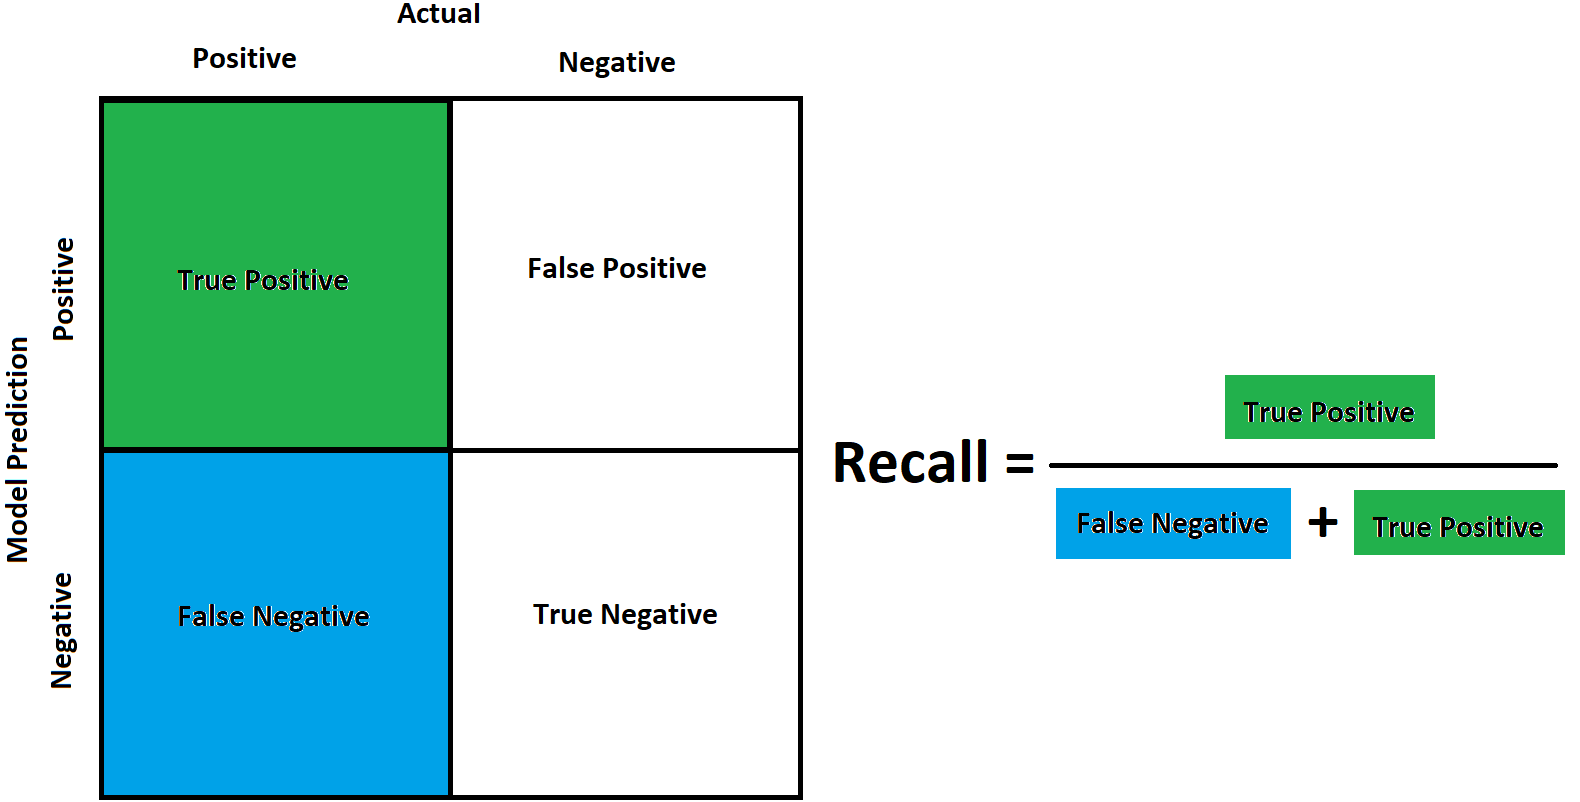

In [2]:
from IPython.display import Image
Image("../../docs/images/Recall.png")

Recall measures the percentage of data $x_i$ in the positive class that is correctly predicted as the positive class ($\frac{TP}{TP+FN}$). For our pregnancy test, this would be the percentage of pregnant women we told were pregnant. For our spam filter, this would be what percentage of spam e-mails did we correctly predict as spam.

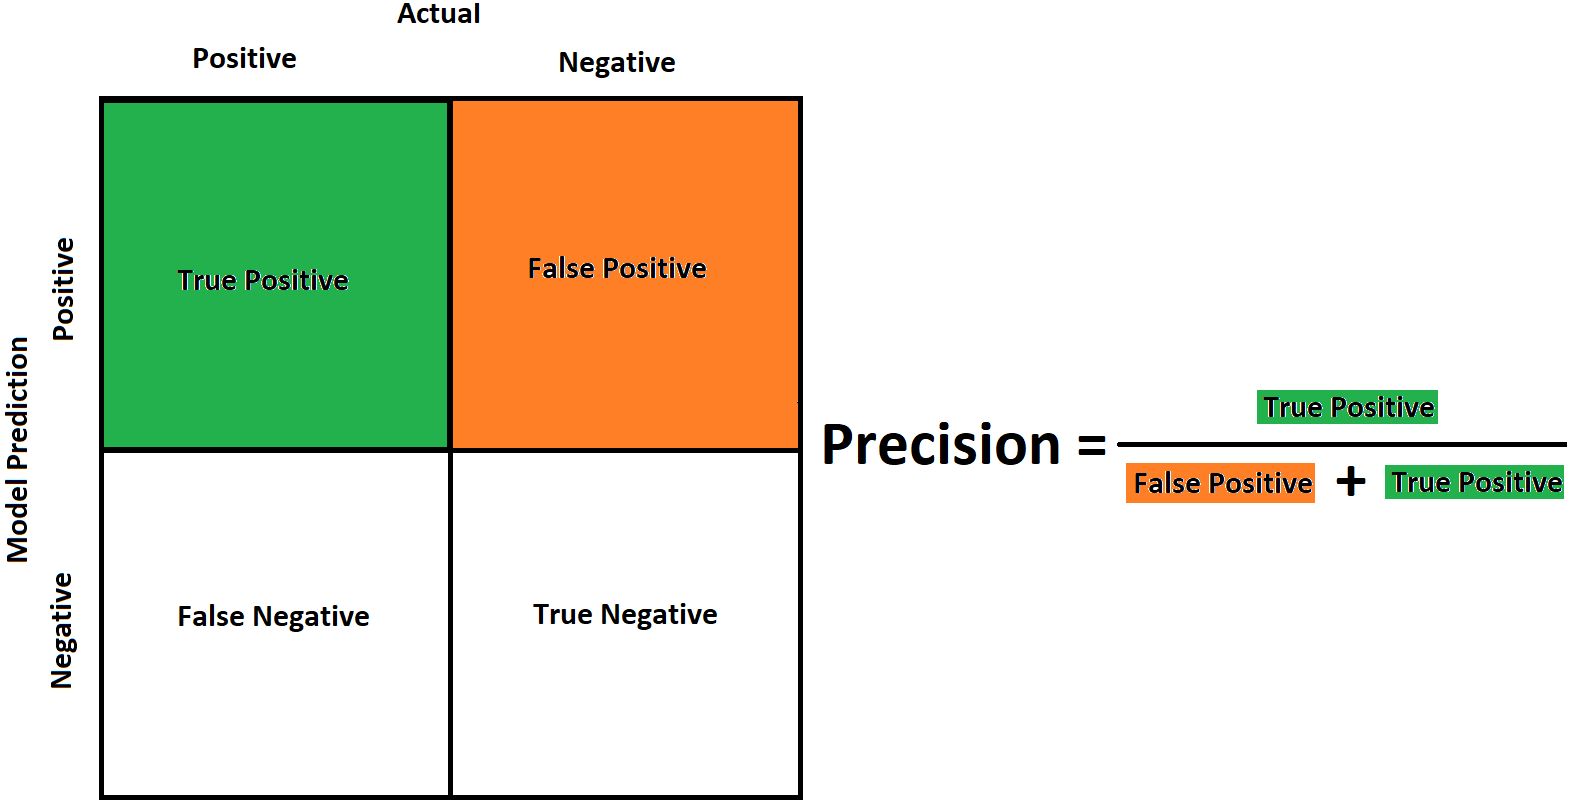

In [3]:
from IPython.display import Image
Image("../../docs/images/Precision.png")

Precision measures the percentage of data $x_i$ that the model predicts as in the positive class that is indeed in the positive class ($\frac{TP}{TP+FP}$). For our pregnancy test this would be the percentage of women whom tested positive were actually pregnant. For our spam filter, this would be the percentage of e-mails in the spam folder were actually spam.

Exercise: Can you think of instances where recall or precision is more important than the other metric? <br><br>

Exercise: Can you think of similar metrics for negatives? Can you think of a business value for these metrics? <br><br>

### $F_\beta$ Score

While recall and precision are useful, we often want a single summary statistic that conveys the performance of the model, taking into account possible differential preference for one metric over another. Enter the $F_\beta$ score, a magical metric borrowed from information theory that is a harmonic mean between recall and precision. The $\beta$ term weights the precision and recall according to the particular application. In particular, $F_\beta$ measures "the effectivenesss of retrieval with respect to a user who attaches $\beta$ times as much importance to recall as precision" (Van Rijsbergen, "Information Retrieval"). We define two formulas for $F_\beta$ below: one in terms of TP, FP, FN, and TN; and one in terms of precision and recall.

$$F_\beta=(1+\beta^2)\frac{\text{TP}}{(1+\beta^2)\cdot\text{TP}+\beta^2\cdot\text{FN}+\text{FP}}$$

$$F_\beta=(1+\beta^2)\frac{\text{precision}\cdot\text{recall}}{\beta^2\cdot\text{precision}+\text{recall}}$$